In [1]:
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from selenium import webdriver
import urllib.request
import urllib.parse
import pandas as pd
import requests

In [2]:
driver = webdriver.Chrome(r'C:\\Users\\shoseo\\Documents\\ChromeDriver\\chromedriver.exe')
driver.get('https://lol.ps/lab/')
html = driver.page_source

In [18]:
soup = BeautifulSoup(html, 'html.parser')
item_list = soup.find_all('div', {'class': 'list-body digit-90px'})
rows = item.select('.list-item')
ranks = []; names = []; ps_scores = []; win_rates = []; cmplt_times = []
shrt_effs = []; long_effs = []; sample_nums = []; pick_rates = []
for row in tqdm_notebook(rows):
    rank = row.find('span').string
    name = row.find('p').string
    stats = row.select('.item-digit')
    ps_score = float(stats[0].string)
    win_rate = float(stats[1].string)
    pick_rate = float(stats[2].string)
    cmplt_time = int(stats[3].string[:-1])
    shrt_eff = float(stats[4].string)
    long_eff = float(stats[5].string)
    sample_num = int(stats[6].string.replace(',', ''))

    ranks.append(rank); names.append(name); ps_scores.append(ps_score); win_rates.append(win_rate); pick_rates.append(pick_rate)
    cmplt_times.append(cmplt_time); shrt_effs.append(shrt_eff); long_effs.append(long_eff); sample_nums.append(sample_num)

In [19]:
tier_table = pd.DataFrame({
    '순위': ranks,
    '이름': names,
    'PS Score': ps_scores,
    '승률': win_rates,
    '채택률': pick_rates,
    '평균완성시간(분)': cmplt_times,
    '단기 효율': shrt_effs,
    '장기 효율': long_effs,
    '표본 수': sample_nums
})
tier_table = tier_table.set_index('순위')

In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [82]:
ref_table = tier_table.loc[tier_table['표본 수'] >= 5000]
sorted_table1 = ref_table.sort_values(by=['단기 효율'])
sorted_table2 = ref_table.sort_values(by=['장기 효율'])
sorted_table1 = sorted_table1.set_index('이름')
sorted_table2 = sorted_table2.set_index('이름')

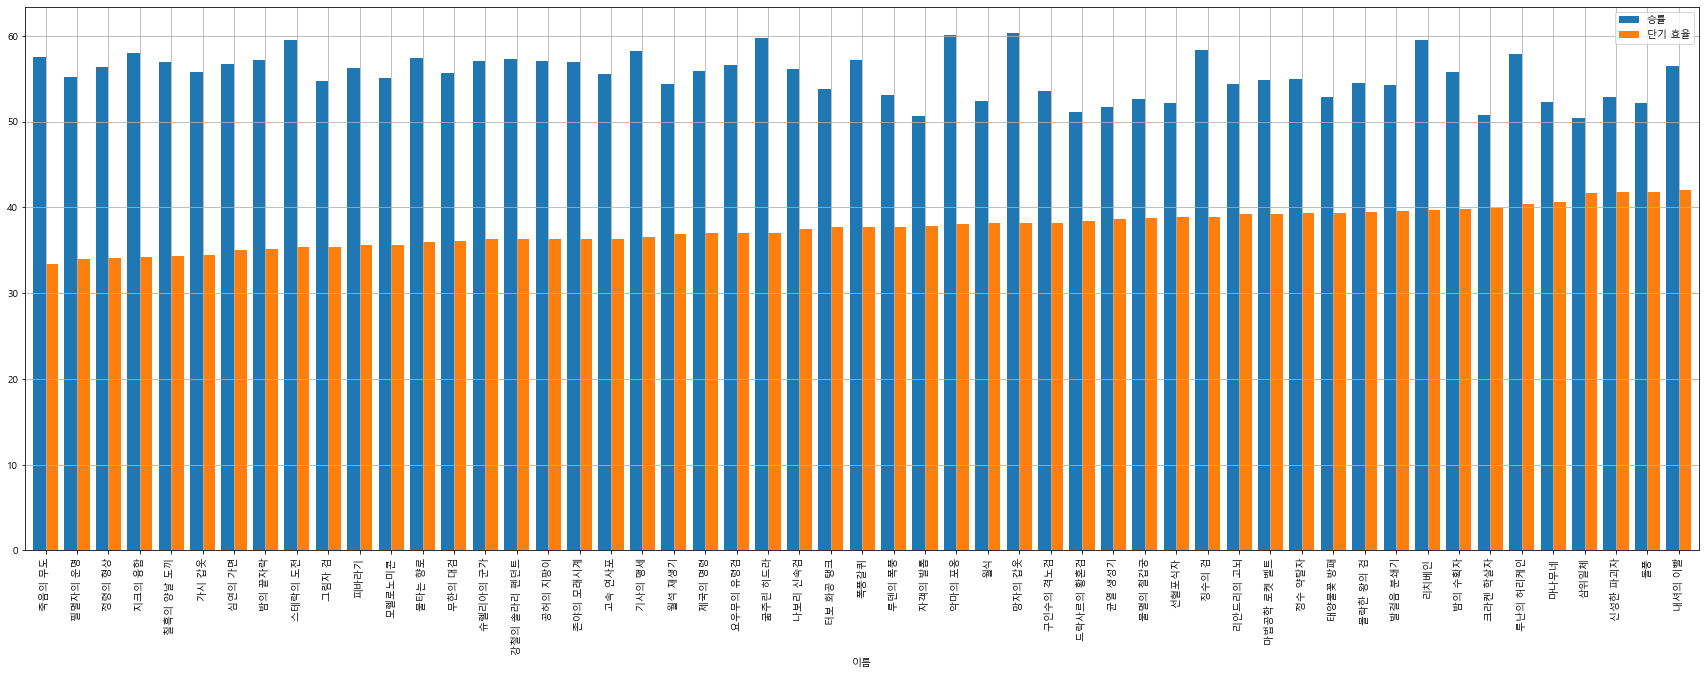

In [83]:
sorted_table1[['승률', '단기 효율']].plot.bar(rot=0, figsize=(30, 10), width=0.8)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

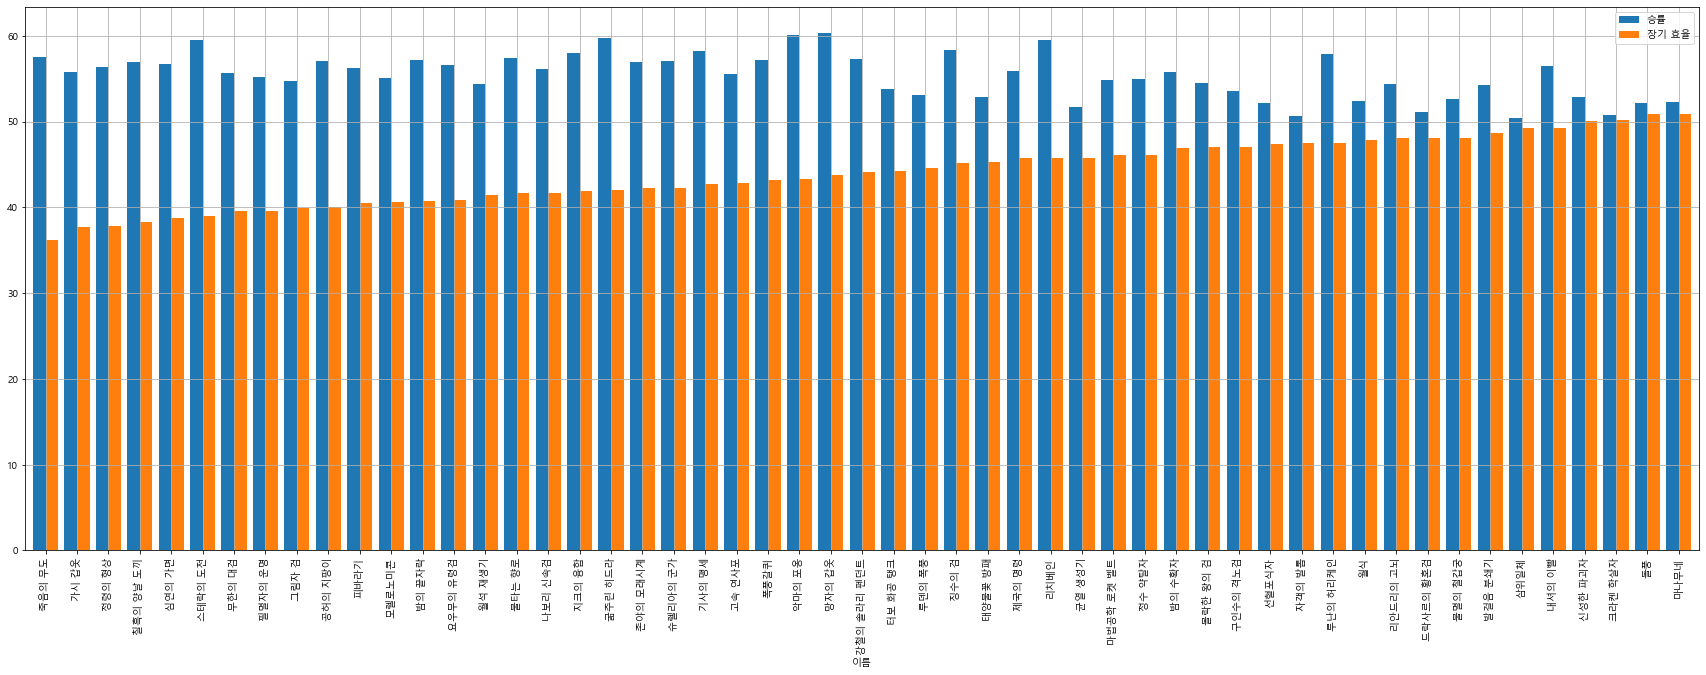

In [84]:
sorted_table2[['승률', '장기 효율']].plot.bar(rot=0, figsize=(30, 10), width=0.8)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()